In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
  print(tf.__version__)
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
#Import the library
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Activation, Dense, Flatten, Conv2D, 
                                     MaxPooling2D, Dropout, BatchNormalization)
import numpy as np
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


The dataset is available from kaggle competion: https://www.kaggle.com/sanikamal/horses-or-humans-dataset

In [0]:
#Upload the dataset from GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Define the directory from GoogleDrive for the dataset
directory_dataset = '/content/drive/My Drive/dataset/horse_or_human/horse-or-human/train'
train_horses_dir = os.path.join('/content/drive/My Drive/dataset/horse_or_human/train/horses')
train_humans_dir = os.path.join('/content/drive/My Drive/dataset/horse_or_human/train/humans')

train_horse_names = os.listdir(train_horses_dir)
print(train_horse_names[:10])
print('total training horse images:', len(os.listdir(train_horses_dir)))

train_human_names = os.listdir(train_humans_dir)
print(train_human_names[:10])
print('total training human images:', len(os.listdir(train_humans_dir)))

['horse43-5.png', 'horse19-2.png', 'horse24-2.png', 'horse41-7.png', 'horse20-6.png', 'horse04-7.png', 'horse22-4.png', 'horse06-5.png', 'horse47-1.png', 'horse02-1.png']
total training horse images: 500
['human17-22.png', 'human10-17.png', 'human15-27.png', 'human10-03.png', 'human12-12.png', 'human07-27.png', 'human09-22.png', 'human12-07.png', 'human05-22.png', 'human12-06.png']
total training human images: 497


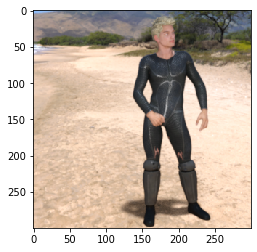

In [0]:
#Show the dataset (human image)
img_path = os.path.join(train_humans_dir, train_human_names[1]) 
img = mpimg.imread(img_path)
plt.imshow(img)

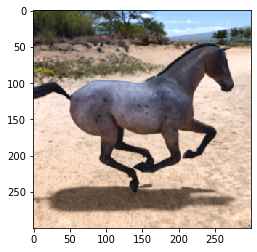

In [0]:
#Show the dataset (horse image)
img_path = os.path.join(train_horses_dir, train_horse_names[1]) 
img = mpimg.imread(img_path)
plt.imshow(img)

In [0]:
#Define the CNN model

class model (tf.keras.Model):
    
    def __init__(self):
       
        super(model, self).__init__()
        
        self.conv_1 = Conv2D(16, kernel_size=(3, 3), activation='relu',input_shape=(300, 300, 3)) 
        self.max_pool_1 = MaxPooling2D(pool_size=(2, 2))
        self.conv_2 = Conv2D(32, kernel_size=(3, 3), activation='relu') 
        self.max_pool_2 = MaxPooling2D(pool_size=(2, 2))
        self.conv_3 = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_3 = MaxPooling2D(pool_size=(2, 2)) 
        self.conv_4 = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_4 = MaxPooling2D(pool_size=(2, 2)) 
  
        self.flatten = tf.keras.layers.Flatten()
 
        self.dense_1 = tf.keras.layers.Dense(units=128, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(units=1, activation='sigmoid')
        
    def call(self, inputs):

        x = self.max_pool_1(self.conv_1(inputs))
        x = self.max_pool_2(self.conv_2(x))
        x = self.max_pool_3(self.conv_3(x))
        x = self.max_pool_4(self.conv_4(x))
                
        x = self.flatten(x)
        x = self.dense_1(x)     
        x = self.dense_2(x)
        
        return x

In [0]:
model = model()

In [0]:
#Define the loss function and the optimizer
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)

In [0]:
#model.summary()

In [0]:
#Compile the model
model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['acc'])

In [0]:
#Preprocessing and rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(directory_dataset, target_size=(300, 300), batch_size=128,  class_mode='binary')

Found 940 images belonging to 2 classes.


In [0]:
#Define a callback --> stop the train if the loss is less of 0.2
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.2):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [0]:
#Train the model
history = model.fit_generator(
      train_generator,
   #   steps_per_epoch=8,  
      epochs=8,
      verbose=1, callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Train for 8 steps
Epoch 1/8
8/8 [==============================] - 257s 32s/step - loss: 1.3579 - acc: 0.4968
Epoch 2/8
8/8 [==============================] - 82s 10s/step - loss: 0.5967 - acc: 0.7053
Epoch 3/8
8/8 [==============================] - 82s 10s/step - loss: 1.0069 - acc: 0.7404
Epoch 4/8
8/8 [==============================] - 82s 10s/step - loss: 0.3386 - acc: 0.8702
Epoch 5/8
8/8 [==============================] - 83s 10s/step - loss: 0.2291 - acc: 0.9181
Epoch 6/8
7/8 [=========================>....] - ETA: 11s - loss: 0.1594 - acc: 0.9353
Reached 80% accuracy so cancelling training!
8/8 [==============================] - 83s 10s/step - loss: 0.1596 - acc: 0.9362


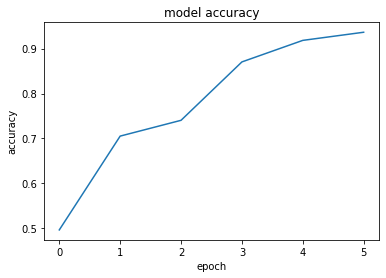

In [0]:
#Plot the accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

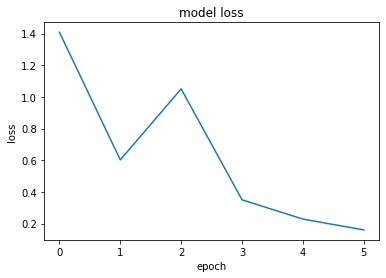

In [0]:
#Plot the loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [0]:
#Upload a new image
uploaded = files.upload()

Saving valhuman05-27.png to valhuman05-27.png


In [0]:
# predicting images
for i in uploaded.keys():
  path = '/content/' + i
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes[0])
  if classes[0]>0.5:
    print(i + " is a human")
  else:
    print(i + " is a horse")

[1.]
valhuman05-27.png is a human
